Problem 1 - Data Overview
- Import the libraries - Load the data - Check the structure of the data - Check the types of the data - Check for and treat (if needed) missing values - Check the statistical summary --8 Check for and treat (if needed) data irregularities - Observations and Insights


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [3]:
df= pd.read_csv('C:/Users/user/Downloads/DSBA project/austo_automobile+%282%29+%281%29.csv')


In [4]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [5]:
df.shape

(1581, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


Missing value columns: Gender- categorical , Partner Salary-numerical
Partner salary should be numerical


In [7]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19573.149277,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


In [8]:
#treating bad data in Gender column

df["Gender"].unique()


array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [9]:
#Femal Femle should be Female so we need to replace data and replace nan with 
df["Gender"]=df['Gender'].replace('Femle','Female')
df["Gender"]=df['Gender'].replace('Femal','Female')


In [10]:
#treating bad data in Partner salary column
df["Gender"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1581 entries, 0 to 1580
Series name: Gender
Non-Null Count  Dtype 
--------------  ----- 
1528 non-null   object
dtypes: object(1)
memory usage: 12.5+ KB


In [11]:
df["Partner_salary"].describe()

count     1475.000000
mean     20225.559322
std      19573.149277
min          0.000000
25%          0.000000
50%      25600.000000
75%      38300.000000
max      80500.000000
Name: Partner_salary, dtype: float64

In [12]:
df.Gender=df.Gender.fillna(df.Gender.mode())

In [13]:
#treating Null Values
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

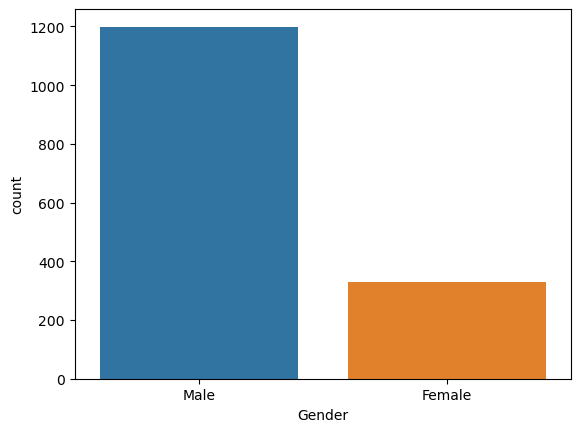

In [14]:
sns.countplot(df, x='Gender')

<Axes: xlabel='Partner_salary'>

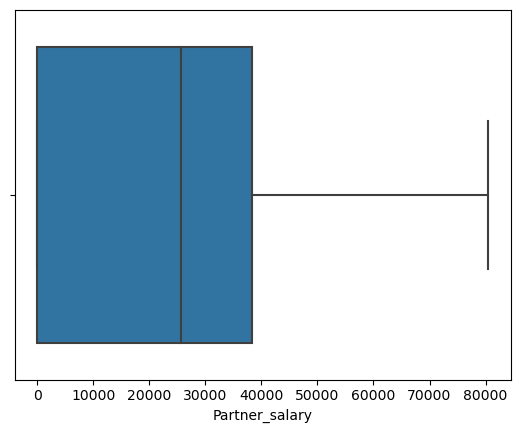

In [15]:
#we see that Gender column is a categorical variable so we will impute null value with mode
# checking for missing values in Partner salary
sns.boxplot(x='Partner_salary', data=df)

In [16]:
#we see that no outliers are present so we can fill the values with mean
import scipy.stats as stats


In [17]:
df.Partner_salary=df.Partner_salary.fillna(df.Partner_salary.mean())

In [18]:
df.Partner_salary.isnull().sum()

0

In [19]:

df['Gender'].fillna(df['Gender'].mode(), inplace= True)


In [20]:
df.isnull().sum()

Age                  0
Gender              53
Profession           0
Marital_status       0
Education            0
No_of_Dependents     0
Personal_loan        0
House_loan           0
Partner_working      0
Salary               0
Partner_salary       0
Total_salary         0
Price                0
Make                 0
dtype: int64

In [21]:
df_num = df.select_dtypes(['float64','int64'])
df_cat = df.select_dtypes(['object'])

In [22]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   No_of_Dependents  1581 non-null   int64  
 2   Salary            1581 non-null   int64  
 3   Partner_salary    1581 non-null   float64
 4   Total_salary      1581 non-null   int64  
 5   Price             1581 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 74.2 KB


In [23]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1528 non-null   object
 1   Profession       1581 non-null   object
 2   Marital_status   1581 non-null   object
 3   Education        1581 non-null   object
 4   Personal_loan    1581 non-null   object
 5   House_loan       1581 non-null   object
 6   Partner_working  1581 non-null   object
 7   Make             1581 non-null   object
dtypes: object(8)
memory usage: 98.9+ KB


In [24]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [25]:
imr=imputer.fit(df_cat)
df_cat=pd.DataFrame(imr.transform(df_cat), columns=df_cat.columns)

In [26]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1581 non-null   object
 1   Profession       1581 non-null   object
 2   Marital_status   1581 non-null   object
 3   Education        1581 non-null   object
 4   Personal_loan    1581 non-null   object
 5   House_loan       1581 non-null   object
 6   Partner_working  1581 non-null   object
 7   Make             1581 non-null   object
dtypes: object(8)
memory usage: 98.9+ KB


In [27]:
#concat both data frames
dfnew=pd.concat([df_num,df_cat],axis=1,join="inner")

In [28]:
dfnew.head()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
0,53,4,99300,70700.0,170000,61000,Male,Business,Married,Post Graduate,No,No,Yes,SUV
1,53,4,95500,70300.0,165800,61000,Female,Salaried,Married,Post Graduate,Yes,No,Yes,SUV
2,53,3,97300,60700.0,158000,57000,Female,Salaried,Married,Post Graduate,No,No,Yes,SUV
3,53,2,72500,70300.0,142800,61000,Female,Salaried,Married,Graduate,Yes,No,Yes,SUV
4,53,3,79700,60200.0,139900,57000,Male,Salaried,Married,Post Graduate,No,No,Yes,SUV


In [29]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   No_of_Dependents  1581 non-null   int64  
 2   Salary            1581 non-null   int64  
 3   Partner_salary    1581 non-null   float64
 4   Total_salary      1581 non-null   int64  
 5   Price             1581 non-null   int64  
 6   Gender            1581 non-null   object 
 7   Profession        1581 non-null   object 
 8   Marital_status    1581 non-null   object 
 9   Education         1581 non-null   object 
 10  Personal_loan     1581 non-null   object 
 11  House_loan        1581 non-null   object 
 12  Partner_working   1581 non-null   object 
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [30]:
dfnew['Partner_salary']=dfnew['Partner_salary'].astype('int64')

In [31]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   No_of_Dependents  1581 non-null   int64 
 2   Salary            1581 non-null   int64 
 3   Partner_salary    1581 non-null   int64 
 4   Total_salary      1581 non-null   int64 
 5   Price             1581 non-null   int64 
 6   Gender            1581 non-null   object
 7   Profession        1581 non-null   object
 8   Marital_status    1581 non-null   object
 9   Education         1581 non-null   object
 10  Personal_loan     1581 non-null   object
 11  House_loan        1581 non-null   object
 12  Partner_working   1581 non-null   object
 13  Make              1581 non-null   object
dtypes: int64(6), object(8)
memory usage: 173.1+ KB


In [32]:
#check for duplicates
dups=dfnew.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [33]:
dfnew.shape

(1581, 14)


2.Explore all the variables (categorical and numerical) in the data - Check for and treat (if needed) outliers - Observations and Insights

3.Bivariate Analysis
Explore the relationship between all numerical variables - Explore the correlation between all numerical variables - Explore the relationship between categorical vs numerical variables


In [34]:
dfnew['Age'].unique()

array([53, 52, 50, 49, 47, 46, 45, 51, 54, 48, 44, 43, 42, 41, 40, 39, 38,
       37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22],
      dtype=int64)

In [35]:
dfnew['Profession'].unique()

array(['Business', 'Salaried'], dtype=object)

In [36]:
dfnew['Marital_status'].unique()

array(['Married', 'Single'], dtype=object)

In [37]:
dfnew['Education'].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

<Axes: xlabel='Age'>

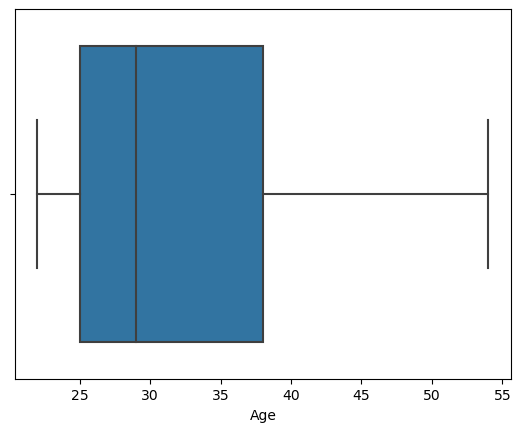

In [38]:
sns.boxplot(data=dfnew, x="Age")

<Axes: xlabel='Salary'>

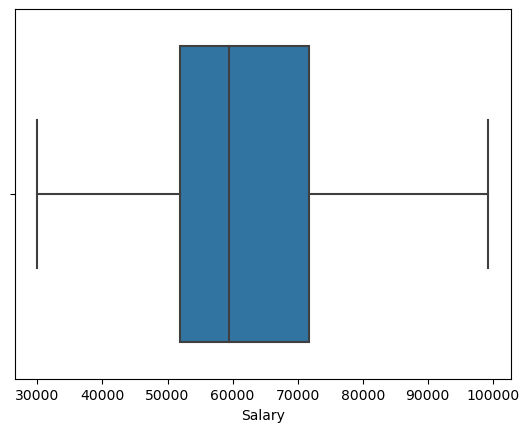

In [39]:
sns.boxplot(data=dfnew, x="Salary")

<Axes: xlabel='Partner_salary'>

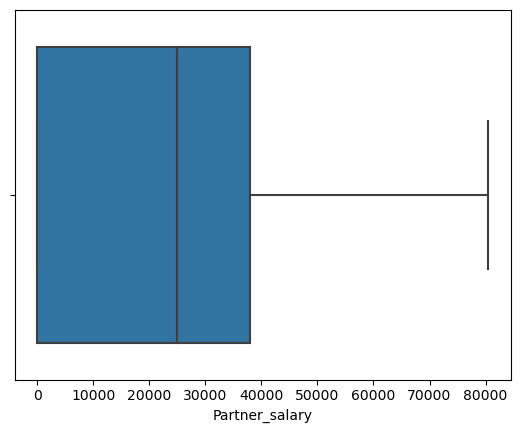

In [40]:
sns.boxplot(data=dfnew, x="Partner_salary")

<Axes: xlabel='Price'>

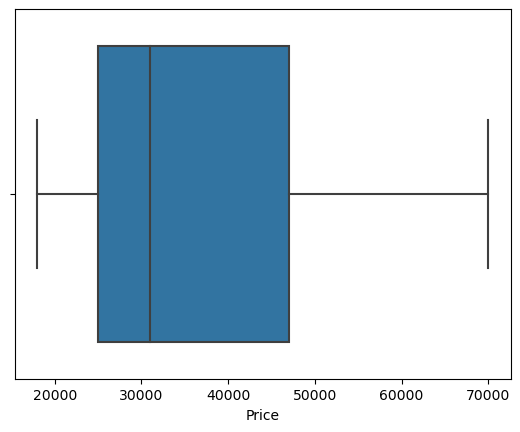

In [41]:
sns.boxplot(data=dfnew, x="Price")

<Axes: xlabel='No_of_Dependents'>

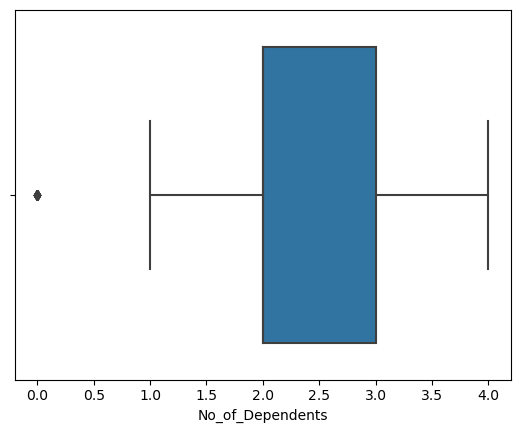

In [42]:
sns.boxplot(data=dfnew, x="No_of_Dependents")

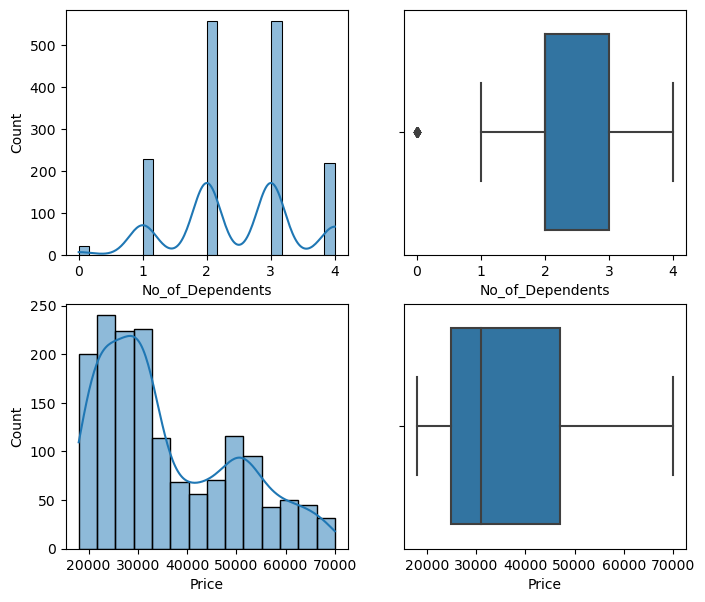

In [66]:
fig, axes=plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(8,7)

sns.histplot(dfnew['No_of_Dependents'], kde=True, ax=axes[0][0])
sns.boxplot(x='No_of_Dependents', data=dfnew, ax=axes[0][1])
sns.histplot(dfnew['Price'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Price', data=dfnew , ax=axes[1][1])
plt.show()

In [44]:
dfnew['Make'].value_counts(normalize=True)


Make
Sedan        0.444023
Hatchback    0.368121
SUV          0.187856
Name: proportion, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_10588\487737862.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dfnew, x='Make', palette='warm')


<Axes: xlabel='Make', ylabel='Count'>

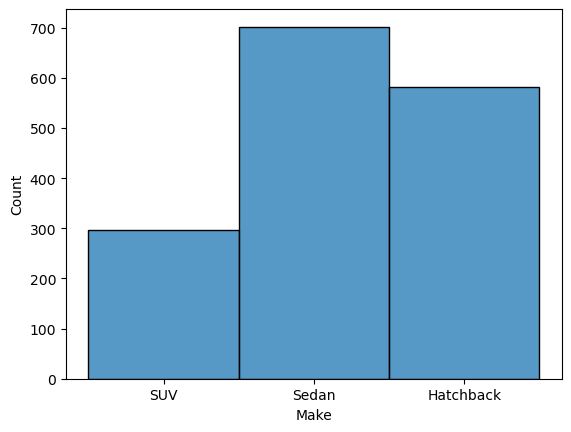

In [45]:
sns.histplot(data=dfnew, x='Make', palette='warm')

Bivariate analysis

Bivariate Analysis Explore the relationship between all numerical variables - Explore the correlation between all numerical variables - Explore the relationship between categorical vs numerical variables

In [46]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   No_of_Dependents  1581 non-null   int64 
 2   Salary            1581 non-null   int64 
 3   Partner_salary    1581 non-null   int64 
 4   Total_salary      1581 non-null   int64 
 5   Price             1581 non-null   int64 
 6   Gender            1581 non-null   object
 7   Profession        1581 non-null   object
 8   Marital_status    1581 non-null   object
 9   Education         1581 non-null   object
 10  Personal_loan     1581 non-null   object
 11  House_loan        1581 non-null   object
 12  Partner_working   1581 non-null   object
 13  Make              1581 non-null   object
dtypes: int64(6), object(8)
memory usage: 173.1+ KB


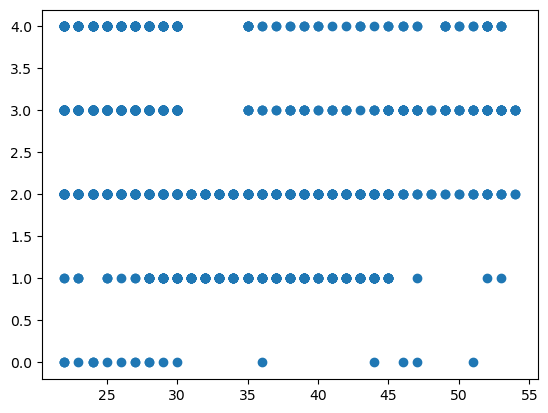

In [47]:
plt.scatter(dfnew["Age"],dfnew["No_of_Dependents"])

<Axes: xlabel='Gender', ylabel='count'>

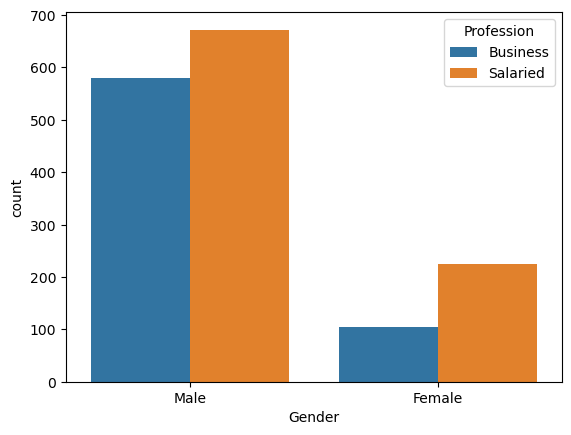

In [48]:
sns.countplot(x='Gender',hue='Profession', data=dfnew)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


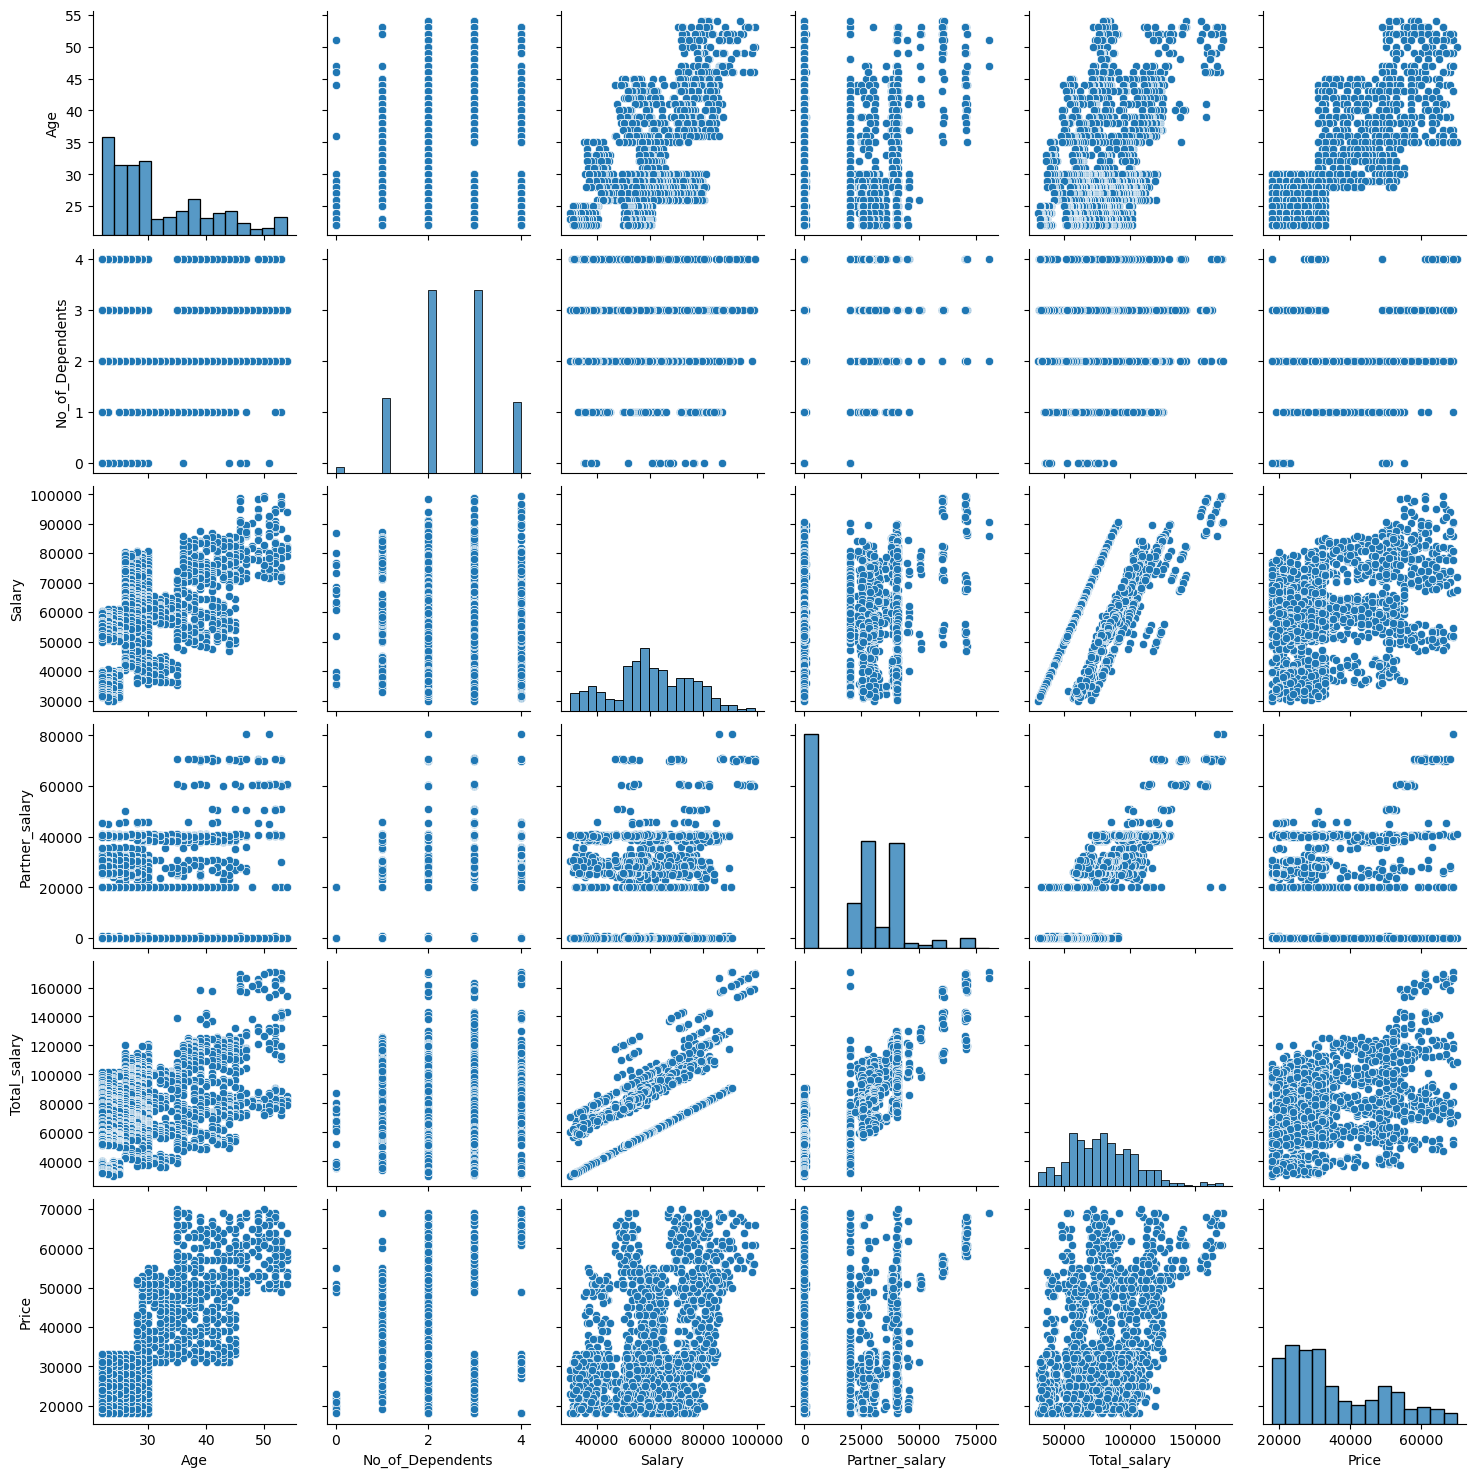

In [49]:
sns.pairplot(dfnew)

<Axes: xlabel='Age', ylabel='Price'>

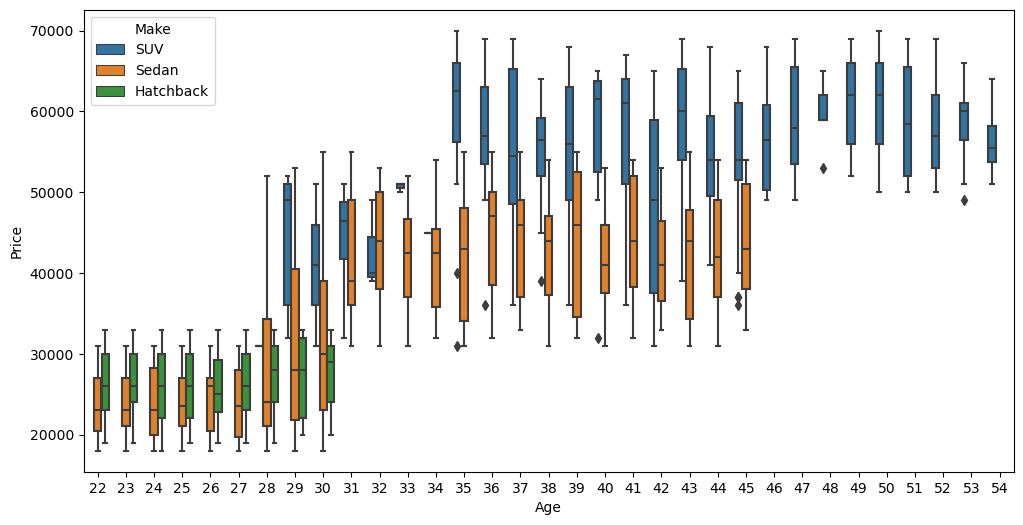

In [50]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Age', y='Price', hue='Make',data=dfnew)

In [51]:
pd.crosstab(dfnew['Gender'], df['Make'],
margins=True, normalize = True)


Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,0.009488,0.109424,0.089184,0.208096
Male,0.358634,0.078431,0.354839,0.791904
All,0.368121,0.187856,0.444023,1.000000


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


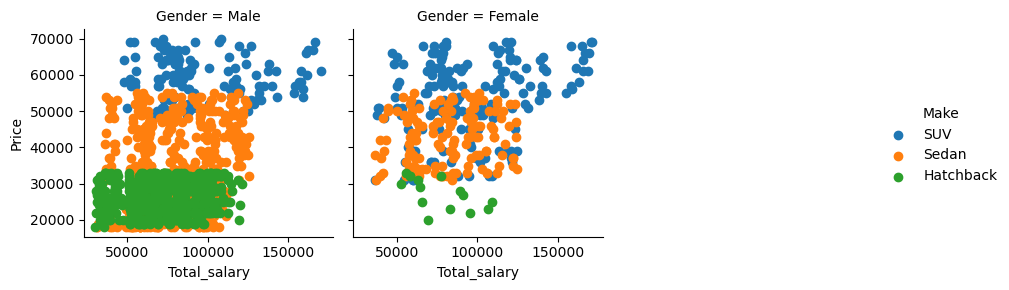

In [52]:
a= sns.FacetGrid(dfnew, col='Gender',
hue='Make',col_wrap=3, height=3)
a=a.map(plt.scatter,'Total_salary',"Price")
a.add_legend()

In [53]:
dfnew.head()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
0,53,4,99300,70700,170000,61000,Male,Business,Married,Post Graduate,No,No,Yes,SUV
1,53,4,95500,70300,165800,61000,Female,Salaried,Married,Post Graduate,Yes,No,Yes,SUV
2,53,3,97300,60700,158000,57000,Female,Salaried,Married,Post Graduate,No,No,Yes,SUV
3,53,2,72500,70300,142800,61000,Female,Salaried,Married,Graduate,Yes,No,Yes,SUV
4,53,3,79700,60200,139900,57000,Male,Salaried,Married,Post Graduate,No,No,Yes,SUV


Explore the data to answer the following key questions: 

1. Do men tend to prefer SUVs more compared to women? 

2. What is the likelihood of a salaried person buying a Sedan? 

3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale? 

4. How does the the amount spent on purchasing automobiles vary by gender? 

5. How much money was spent on purchasing automobiles by individuals who took a personal loan? 

6. How does having a working partner influence the purchase of higher-priced cars?


<Axes: xlabel='Gender', ylabel='count'>

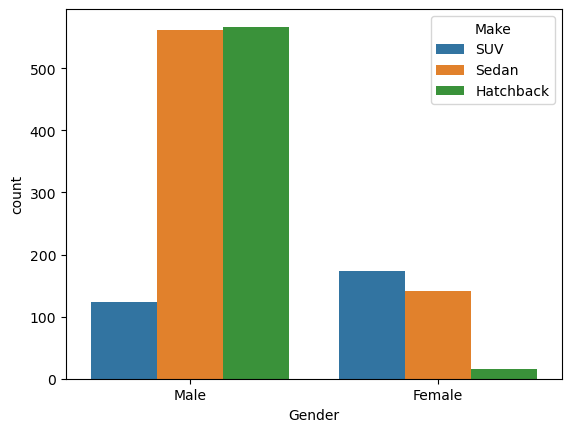

In [54]:
sns.countplot(x='Gender',hue='Make', data=dfnew)

1. Women tend to prefer SUV more then men

In [55]:
pd.crosstab(dfnew['Gender'], df['Make'],
margins=True, normalize = True)

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,0.009488,0.109424,0.089184,0.208096
Male,0.358634,0.078431,0.354839,0.791904
All,0.368121,0.187856,0.444023,1.000000


18% preference is for SUV and out of which 10% is comprise women.

<Axes: xlabel='Profession', ylabel='count'>

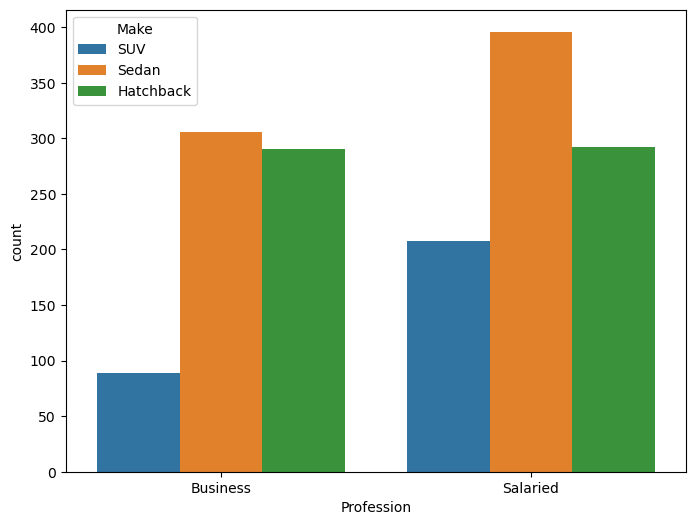

In [56]:
#What is the likelihood of a salaried person buying a Sedan?
fig_dims = (8, 6)
fig = plt.subplots(figsize=fig_dims)
sns.countplot(x='Profession', hue='Make',data=df)

In [57]:
pd.crosstab(dfnew['Profession'], dfnew['Make'],
margins=True, normalize = True)

Make,Hatchback,SUV,Sedan,All
Profession,,,,
Business,0.183428,0.056293,0.193548,0.43327
Salaried,0.184693,0.131562,0.250474,0.56673
All,0.368121,0.187856,0.444023,1.00000


In [58]:
#25% salaired person prefer sedan compared to 19% by business professional.

What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?
As per the data we see that salaried person have a higher preference for SUV than business person. 

How does the the amount spent on purchasing automobiles vary by gender?

<Axes: xlabel='Price', ylabel='Gender'>

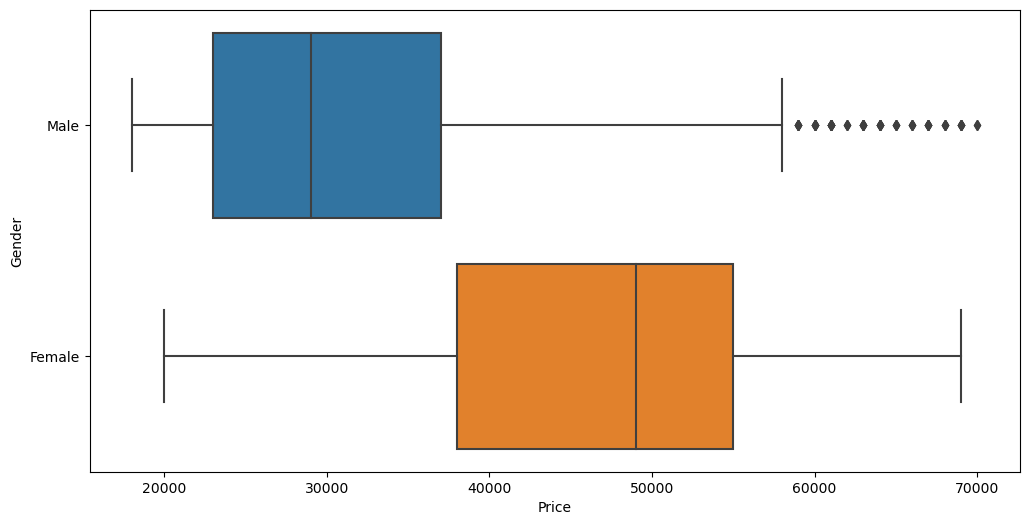

In [59]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Price', y='Gender',data=dfnew)

How much money was spent on purchasing automobiles by individuals who took a personal loan?

In [60]:
x=dfnew[dfnew['Personal_loan']=="Yes"].sum()
x['Price'].sum()

27290000

In [61]:
#Rs. 2,72,90,000 was spent by individuals

How does having a working partner influence the purchase of higher-priced cars?


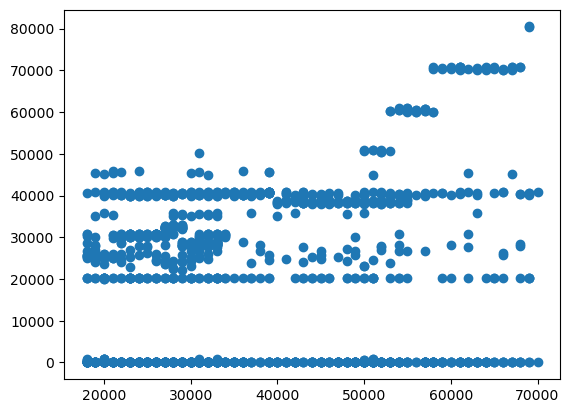

In [62]:

plt.scatter(dfnew['Price'], dfnew['Partner_salary'])

<Axes: >

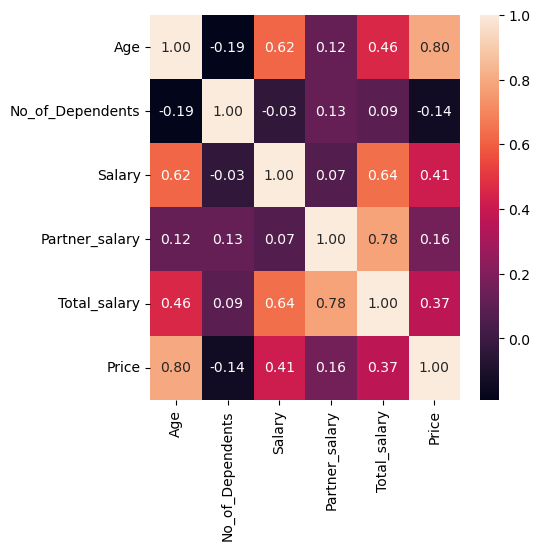

In [70]:

plt.figure(figsize=(5,5))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f")